In [2]:
%matplotlib notebook

In [6]:
import numpy as np
import os
import networkx as nx
import seaborn as sns


from numpy.linalg import eigh
from scipy import sparse as sp
from scipy.sparse import issparse
from matplotlib import pyplot as plt
from collections import defaultdict
from functools import reduce
from scipy.sparse.linalg import eigs

from sklearn.cluster import KMeans
from scipy.sparse.linalg import eigs

from helpers import (
    signed_layout, draw_nodes, draw_edges, flatten, 
    conductance_by_sweeping,
    get_borderless_fig, 
    labels2groups,
    num_ccs, cc_sizes, 
    signed_normalized_laplacian,
    signed_laplacian
) 


In [7]:
from graph_generator.community_graph import make

In [8]:
g, groundtruth = make(4, 2, 1, 0, 0.3, 1)
g.add_edge(8, 0, sign=1)
g.add_edge(9, 0, sign=-1)
g.add_edge(10, 4, sign=-1)
g.add_edge(11, 5, sign=1)

<IPython.core.display.Javascript object>


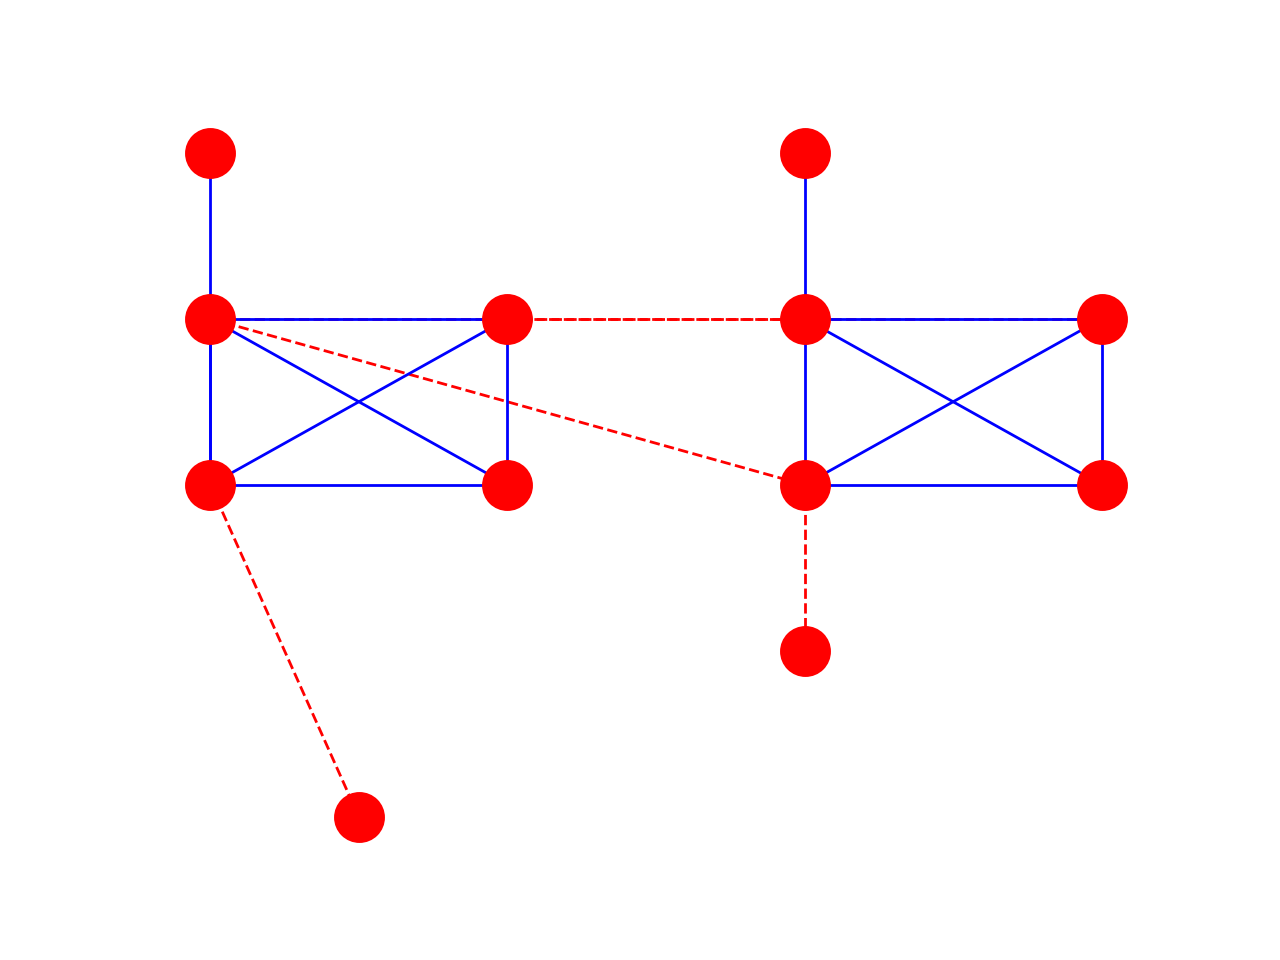

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [27]:
fig, ax = get_borderless_fig()
pos = {
    0: [0, 0], 1: [0, 1], 2: [1, 0], 3: [1, 1],
    4: [2, 0], 5: [2, 1], 6: [3, 0], 7: [3, 1],
    8: [0, 2], 9: [0.5, -2], 10: [2, -1], 11: [2, 2]
}
draw_nodes(g, pos=pos, ax=ax)
# nx.draw_networkx_labels(g, pos, ax=ax)
draw_edges(g, pos=pos, ax=ax)

fig.savefig('figs/eigenvector-illustration-graph.pdf')

In [22]:
A = nx.adjacency_matrix(g, weight='sign')
# L = signed_normalized_laplacian(A)
L = signed_laplacian(g)
eig_val, eig_vec = eigs(L, k=1, which='SM')

In [28]:
print('eigen value', eig_val)

eigen value [-9.2381486e-16+0.j]


<IPython.core.display.Javascript object>


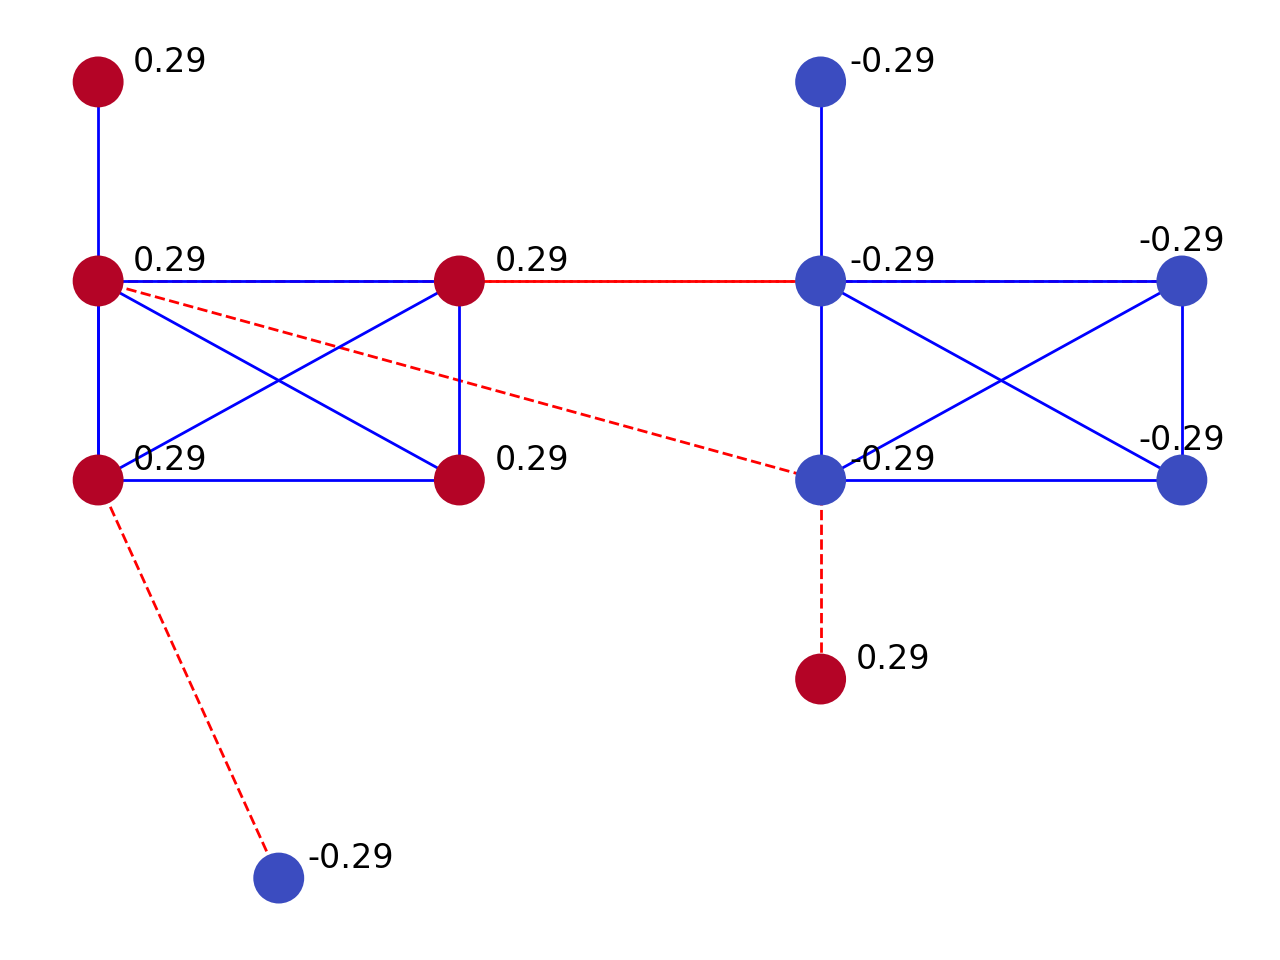

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [26]:
fig, ax = get_borderless_fig()

values = eig_vec.real.flatten()
labels = {i: '{:.2f}'.format(v) for i, v in enumerate(values)}

nx.draw_networkx_nodes(g, pos, node_color=values, node_size=300, cmap=plt.cm.coolwarm, ax=ax)
offset_x, offset_y = 0.2, 0.1
label_pos = {n: [x+offset_x, y+offset_y] for n, (x, y) in pos.items()}
for n in [6, 7]:
    x, y = label_pos[n]
    label_pos[n] = [x-offset_x, y+offset_y]
nx.draw_networkx_labels(g, label_pos, labels=labels, ax=ax, )
draw_edges(g, pos=pos, ax=ax)

fig.tight_layout()
fig.savefig('figs/eigenvector-illustration.pdf')